<a href="https://colab.research.google.com/github/Tharick15/Data-Science-/blob/main/Analise_e_tratamento_de_dados_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados
## Análise e tratamento de dados nulos

# Importação dos dados 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Objetivo:**
  - Aprender a se familiarizar com dados,
  - Aplicar técnicas de estatística descritiva,
  - Praticar a busca por informações em bases de dados,
  - Praticar o uso de ferramentas para visualizar comportamento dos dados (de forma uni e multivariada),
  - Familiarizar-se com ferramentas em Python para análise de dados.

#### Pacotes e Configurações

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
% matplotlib inline

### Carregando Dados

In [ ]:
survey19 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/it_eu_salary_survey/IT Salary Survey EU 2019.csv')
survey20 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/it_eu_salary_survey/IT Salary Survey EU  2020.csv')

print('Survey 2019 Shape: {}'.format(survey19.shape))
print('Survey 2020 Shape: {}'.format(survey20.shape))

Survey 2019 Shape: (991, 23)
Survey 2020 Shape: (1253, 23)


In [ ]:
survey19['Year'] = 2019
survey20['Year'] = 2020

In [ ]:
survey19.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0,Year
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN,2019
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN,2019
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN,2019
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN,2019
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN,2019


In [ ]:
survey20.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Year
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN,2020
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN,2020
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN,2020
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN,2020
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN,2020


**Avaliando colunas:**

In [ ]:
survey19.rename(columns={'Zeitstempel':'Timestamp'}, inplace=True)

# Criando dataframe unificando com dados comuns às 2 pesquisas

In [ ]:
survey19['Annual bonus+stocks one year ago. Only answer if staying in same country'] = survey19['Yearly bonus one year ago. Only answer if staying in same country'] + survey19['Yearly stocks one year ago. Only answer if staying in same country']
survey19.head()

,Timestamp,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0,Year,Annual bonus+stocks one year ago. Only answer if staying in same country
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN,2019,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN,2019,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN,2019,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN,2019,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN,2019,NaN


In [ ]:
survey19.rename(columns={'Position (without seniority)':'Position ','Years of experience':'Total years of experience',
                        'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country':'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
                          }, inplace=True)

In [ ]:
common_col_19_20 = survey19.columns.intersection(survey20.columns).tolist()
common_col_19_20

['Timestamp',
 'Age',
 'Gender',
 'City',
 'Seniority level',
 'Position ',
 'Total years of experience',
 'Your main technology / programming language',
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
 'Number of vacation days',
 'Main language at work',
 'Company size',
 'Company type',
 'Сontract duration',
 'Year',
 'Annual bonus+stocks one year ago. Only answer if staying in same country']

In [ ]:
full_data_2 = pd.concat([survey19[common_col_19_20],survey20[common_col_19_20]], axis=0)
full_data_2

,Timestamp,Age,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Year,Annual bonus+stocks one year ago. Only answer if staying in same country
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,58000.0,29.0,English,50-100,Startup,unlimited,2019,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,22.0,English,10-50,Product,unlimited,2019,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,55000.0,27.0,English,1000+,Startup,unlimited,2019,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,NaN,24.0,English,100-1000,Product,unlimited,2019,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,56000.0,30.0,English,50-100,Product,unlimited,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Senior,Backend Developer,9,Java,70000.0,26,English,51-100,Product,Unlimited contract,2020,72000
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Senior,Researcher/ Consumer Insights Analyst,10,consumer analysis,48000.0,unlimited,English,1000+,Product,Unlimited contract,2020,2500
1250,18/01/2021 23:20:35,39.0,Male,Munich,Lead,IT Operations Manager,15,PHP,90000.0,28,English,101-1000,eCommerce,Unlimited contract,2020,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Middle,Frontend Developer,7,JavaScript,33800.0,27,German,101-1000,Product,Unlimited contract,2020,36400


In [ ]:
full_data_2['Timestamp'] = pd.to_datetime(full_data_2['Timestamp'])
full_data_2['stamp_year'] = full_data_2['Timestamp'].dt.year

In [ ]:
full_data_2 = full_data_2[~(full_data_2['Year']!=full_data_2['stamp_year'])]
full_data_2

,Timestamp,Age,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Year,Annual bonus+stocks one year ago. Only answer if staying in same country,stamp_year
0,2019-02-12 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,58000.0,29.0,English,50-100,Startup,unlimited,2019,NaN,2019
1,2019-02-12 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,22.0,English,10-50,Product,unlimited,2019,NaN,2019
2,2019-02-12 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,55000.0,27.0,English,1000+,Startup,unlimited,2019,NaN,2019
3,2019-02-12 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,NaN,24.0,English,100-1000,Product,unlimited,2019,NaN,2019
4,2019-02-12 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,56000.0,30.0,English,50-100,Product,unlimited,2019,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2020-12-29 23:57:42,29.0,Male,Munich,Middle,Data Scientist,6,SQL,60000.0,28,English,1000+,Product,Unlimited contract,2020,15000,2020
1212,2020-12-30 02:23:59,30.0,Female,Berlin,Lead,Frontend Developer,3,JavaScript,51200.0,30,English,101-1000,Product,Unlimited contract,2020,0,2020
1213,2020-12-30 13:18:32,30.0,Male,Munich,Senior,Software Engineer,8,PHP,65000.0,26,English,51-100,Product,Unlimited contract,2020,0,2020
1214,2020-12-30 16:32:25,29.0,Male,Berlin,Senior,Backend Developer,5,Go,70000.0,25,English,101-1000,Product,Unlimited contract,2020,0,2020


## Análise Exploratória
**Dados Categóricos**

In [ ]:
full_data_2.select_dtypes('object')

,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Annual bonus+stocks one year ago. Only answer if staying in same country
0,Male,Berlin,Senior,Fullstack Developer,13,PHP,29.0,English,50-100,Startup,unlimited,NaN
1,Male,Berlin,Middle,Backend Developer,3,Python,22.0,English,10-50,Product,unlimited,NaN
2,Male,Berlin,Middle,Mobile Developer,4,Kotlin,27.0,English,1000+,Startup,unlimited,NaN
3,Male,Berlin,Senior,Backend Developer,6,PHP,24.0,English,100-1000,Product,unlimited,NaN
4,Male,Berlin,Senior,Embedded Developer,10,C/C++,30.0,English,50-100,Product,unlimited,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,Male,Munich,Middle,Data Scientist,6,SQL,28,English,1000+,Product,Unlimited contract,15000
1212,Female,Berlin,Lead,Frontend Developer,3,JavaScript,30,English,101-1000,Product,Unlimited contract,0
1213,Male,Munich,Senior,Software Engineer,8,PHP,26,English,51-100,Product,Unlimited contract,0
1214,Male,Berlin,Senior,Backend Developer,5,Go,25,English,101-1000,Product,Unlimited contract,0


### - Gênero (Gender):

In [ ]:
full_data_2['Gender'].value_counts()

Male       1837
Female      339
Diverse       2
Name: Gender, dtype: int64

In [ ]:
full_data_2[full_data_2['Gender']=='M']

,Timestamp,Age,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Year,Annual bonus+stocks one year ago. Only answer if staying in same country,stamp_year


In [ ]:
full_data_2.loc[full_data_2['Gender']=='M', 'Gender'] = 'Male'
full_data_2.loc[full_data_2['Gender']=='F', 'Gender'] = 'Female'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
full_data_2['Gender'].value_counts()

Male       1837
Female      339
Diverse       2
Name: Gender, dtype: int64

In [ ]:
full_data_2['Gender'].value_counts(normalize=True)

Male       0.843434
Female     0.155647
Diverse    0.000918
Name: Gender, dtype: float64

In [ ]:
full_data_2['Gender'].value_counts(normalize=True).round(2)

Male       0.84
Female     0.16
Diverse    0.00
Name: Gender, dtype: float64

In [ ]:
full_data_2['Gender'].isna().sum()

9

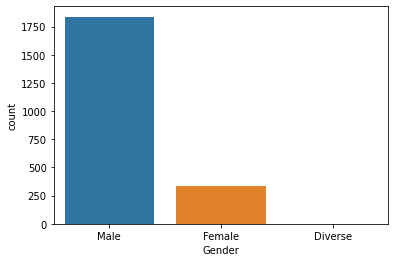

In [ ]:
sns.countplot(x = full_data_2['Gender']);

### - Principal língua no trabalho (Main language at work):

In [ ]:
full_data_2['Main language at work'].value_counts()

English               1732
Deutsch                180
German                 178
Russian                 44
French                   6
Italian                  5
Polish                   4
Spanish                  4
English and German       2
Русский                  2
Czech                    2
Dutch                    1
Polish+English           1
Ukrainian                1
English+Deutsch          1
50/50                    1
Deuglisch                1
both                     1
Russian, English         1
Name: Main language at work, dtype: int64

In [ ]:
full_data_2[full_data_2['Main language at work'].isin(['English and German',
                                                   'English+Deutsch',
                                                   'Polish+English',
                                                   'Team - Russian; Cross-team - English;',
                                                   'Deutsch/Englisch',
                                                   'Russian, English'])]

,Timestamp,Age,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Year,Annual bonus+stocks one year ago. Only answer if staying in same country,stamp_year
91,2019-02-12 13:23:36,31.0,Male,Frankfurt,Middle,System Administrator,10,"Linux-Stack, Networking",55000.0,30.0,English+Deutsch,10-50,Consulting / Agency,unlimited,2019,NaN,2019
759,2019-10-12 21:52:08,28.0,Female,Warsaw,Senior,Fullstack Developer,5,R,144000.0,32.0,Polish+English,100-1000,Consulting / Agency,unlimited,2019,1.0,2019
121,2020-11-24 11:59:20,32.0,Female,Kempten,Middle,Fullstack Developer,10,C#,NaN,30,English and German,51-100,Product,Unlimited contract,2020,NaN,2020
194,2020-11-24 12:52:56,36.0,Male,Berlin,Middle,Software Engineer,7,"C++, Java, Embedded C",42000.0,25,English and German,up to 10,Product,Unlimited contract,2020,NaN,2020
1040,2020-01-12 18:58:24,26.0,Female,Prague,Middle,Software Engineer,4,C#,55000.0,25,"Russian, English",1000+,Product,Unlimited contract,2020,0,2020


In [ ]:
full_data_2.loc[full_data_2['Main language at work'].isin(['English and German',
                                                       'English+Deutsch',
                                                       'Polish+English',
                                                       'Team - Russian; Cross-team - English;',
                                                       'Deutsch/Englisch',
                                                       'Russian, English']), 'Main language at work'] = 'English'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
full_data_2['Main language at work'].value_counts()

English      1737
Deutsch       180
German        178
Russian        44
French          6
Italian         5
Spanish         4
Polish          4
Русский         2
Czech           2
Dutch           1
Ukrainian       1
50/50           1
Deuglisch       1
both            1
Name: Main language at work, dtype: int64

In [ ]:
full_data_2.loc[full_data_2['Main language at work'].isin(['Deutsch','Deuglisch']), 'Main language at work'] = 'German'
full_data_2.loc[full_data_2['Main language at work']=='Русский', 'Main language at work'] = 'Russian'
full_data_2['Main language at work'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


English      1737
German        359
Russian        46
French          6
Italian         5
Spanish         4
Polish          4
Czech           2
Dutch           1
Ukrainian       1
50/50           1
both            1
Name: Main language at work, dtype: int64

In [ ]:
full_data_2['Main language at work'].isna().sum()

20

In [ ]:
full_data_2.loc[~full_data_2['Main language at work'].isin(['English','German','Russian']), 'Main language at work'] = 'Other'
full_data_2['Main language at work'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


English    1737
German      359
Russian      46
Other        45
Name: Main language at work, dtype: int64

In [ ]:
full_data_2['Main language at work'].value_counts(normalize=True).round(2)

English    0.79
German     0.16
Russian    0.02
Other      0.02
Name: Main language at work, dtype: float64

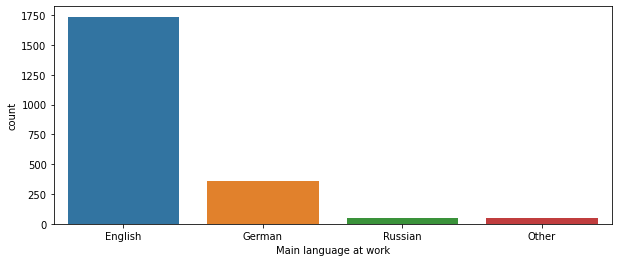

In [ ]:
plt.figure(figsize = (10,4))
sns.countplot(x = full_data_2['Main language at work']);

### - Senioridade (Seniority level)

In [ ]:
full_data_2['Seniority level'].value_counts()

Senior                                       1129
Middle                                        622
Lead                                          193
Junior                                        149
Head                                           47
Principal                                       6
C-level executive manager                       1
Intern                                          1
Entry level                                     1
Working Student                                 1
C-Level                                         1
no idea, there are no ranges in the firm        1
Student                                         1
intern                                          1
No level                                        1
Key                                             1
Director                                        1
CTO                                             1
Work Center Manager                             1
Manager                                         1


In [ ]:
full_data_2.loc[full_data_2['Seniority level'].isin(['intern','student',
                                                       'Working Student',
                                                       'Student',
                                                       'Intern']), 'Seniority level'] = 'Intern'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
full_data_2.loc[full_data_2['Seniority level'].isin(['C-Level',
                                                    'C-level executive manager',
                                                     'CTO','Principal']), 'Seniority level'] = 'C-level'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
full_data_2['Seniority level'].value_counts()

Senior                                       1129
Middle                                        622
Lead                                          193
Junior                                        149
Head                                           47
C-level                                         9
Intern                                          5
No level                                        1
VP                                              1
Manager                                         1
Work Center Manager                             1
No level                                        1
Director                                        1
Key                                             1
no idea, there are no ranges in the firm        1
Entry level                                     1
Name: Seniority level, dtype: int64

In [ ]:
full_data_2.loc[~full_data_2['Seniority level'].isin(['Senior','Lead','Junior','Principal','C-level',
                                                    'Intern','Middle']), 'Seniority level'] = 'Outros'
full_data_2['Seniority level'].value_counts()   

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Senior     1129
Middle      622
Lead        193
Junior      149
Outros       80
C-level       9
Intern        5
Name: Seniority level, dtype: int64

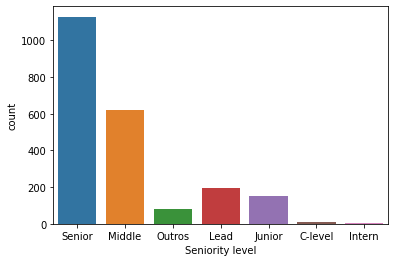

In [ ]:
sns.countplot(x = full_data_2['Seniority level']);

### - Cargo (Position):

In [ ]:
#Analisando apenas os 10 cargos que mais aparecem na base
mask = full_data_2['Position '].value_counts(normalize=True).round(2).head(10).index
full_data_2= full_data_2.loc[full_data_2['Position '].isin(mask)]
full_data_2

,Timestamp,Age,Gender,City,Seniority level,Position,Total years of experience,Your main technology / programming language,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Year,Annual bonus+stocks one year ago. Only answer if staying in same country,stamp_year
0,2019-02-12 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,58000.0,29.0,English,50-100,Startup,unlimited,2019,NaN,2019
1,2019-02-12 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,22.0,English,10-50,Product,unlimited,2019,NaN,2019
2,2019-02-12 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,55000.0,27.0,English,1000+,Startup,unlimited,2019,NaN,2019
3,2019-02-12 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,NaN,24.0,English,100-1000,Product,unlimited,2019,NaN,2019
6,2019-02-12 11:21:26,34.0,Male,Berlin,Senior,Backend Developer,12,Java,76000.0,25.0,English,50-100,Startup,unlimited,2019,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2020-12-29 23:57:42,29.0,Male,Munich,Middle,Data Scientist,6,SQL,60000.0,28,English,1000+,Product,Unlimited contract,2020,15000,2020
1212,2020-12-30 02:23:59,30.0,Female,Berlin,Lead,Frontend Developer,3,JavaScript,51200.0,30,English,101-1000,Product,Unlimited contract,2020,0,2020
1213,2020-12-30 13:18:32,30.0,Male,Munich,Senior,Software Engineer,8,PHP,65000.0,26,English,51-100,Product,Unlimited contract,2020,0,2020
1214,2020-12-30 16:32:25,29.0,Male,Berlin,Senior,Backend Developer,5,Go,70000.0,25,English,101-1000,Product,Unlimited contract,2020,0,2020


In [ ]:
full_data_2['Position '].isna().sum()

0

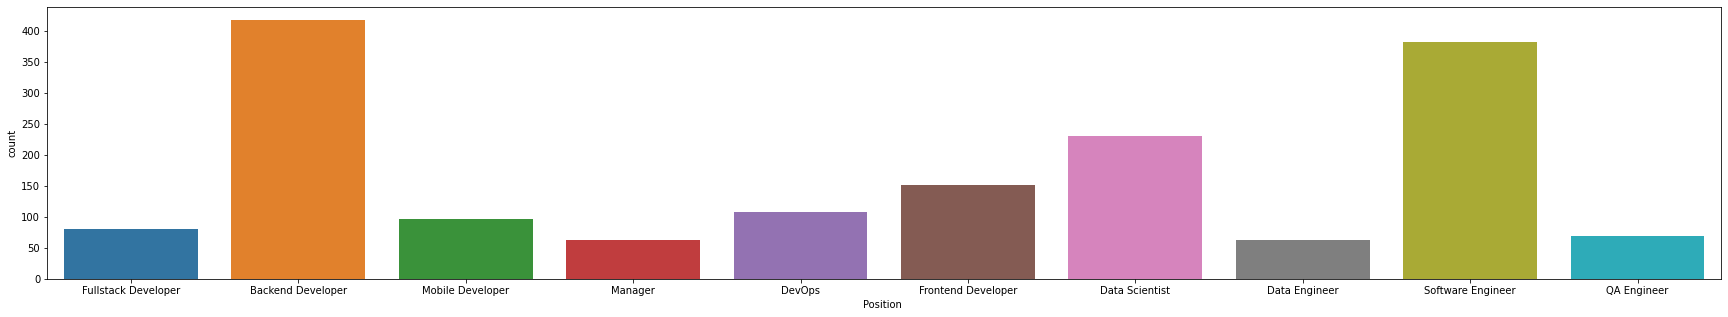

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot(x = full_data_2['Position ']);

# Tratar dados nulos

<Figure size 1080x720 with 0 Axes>

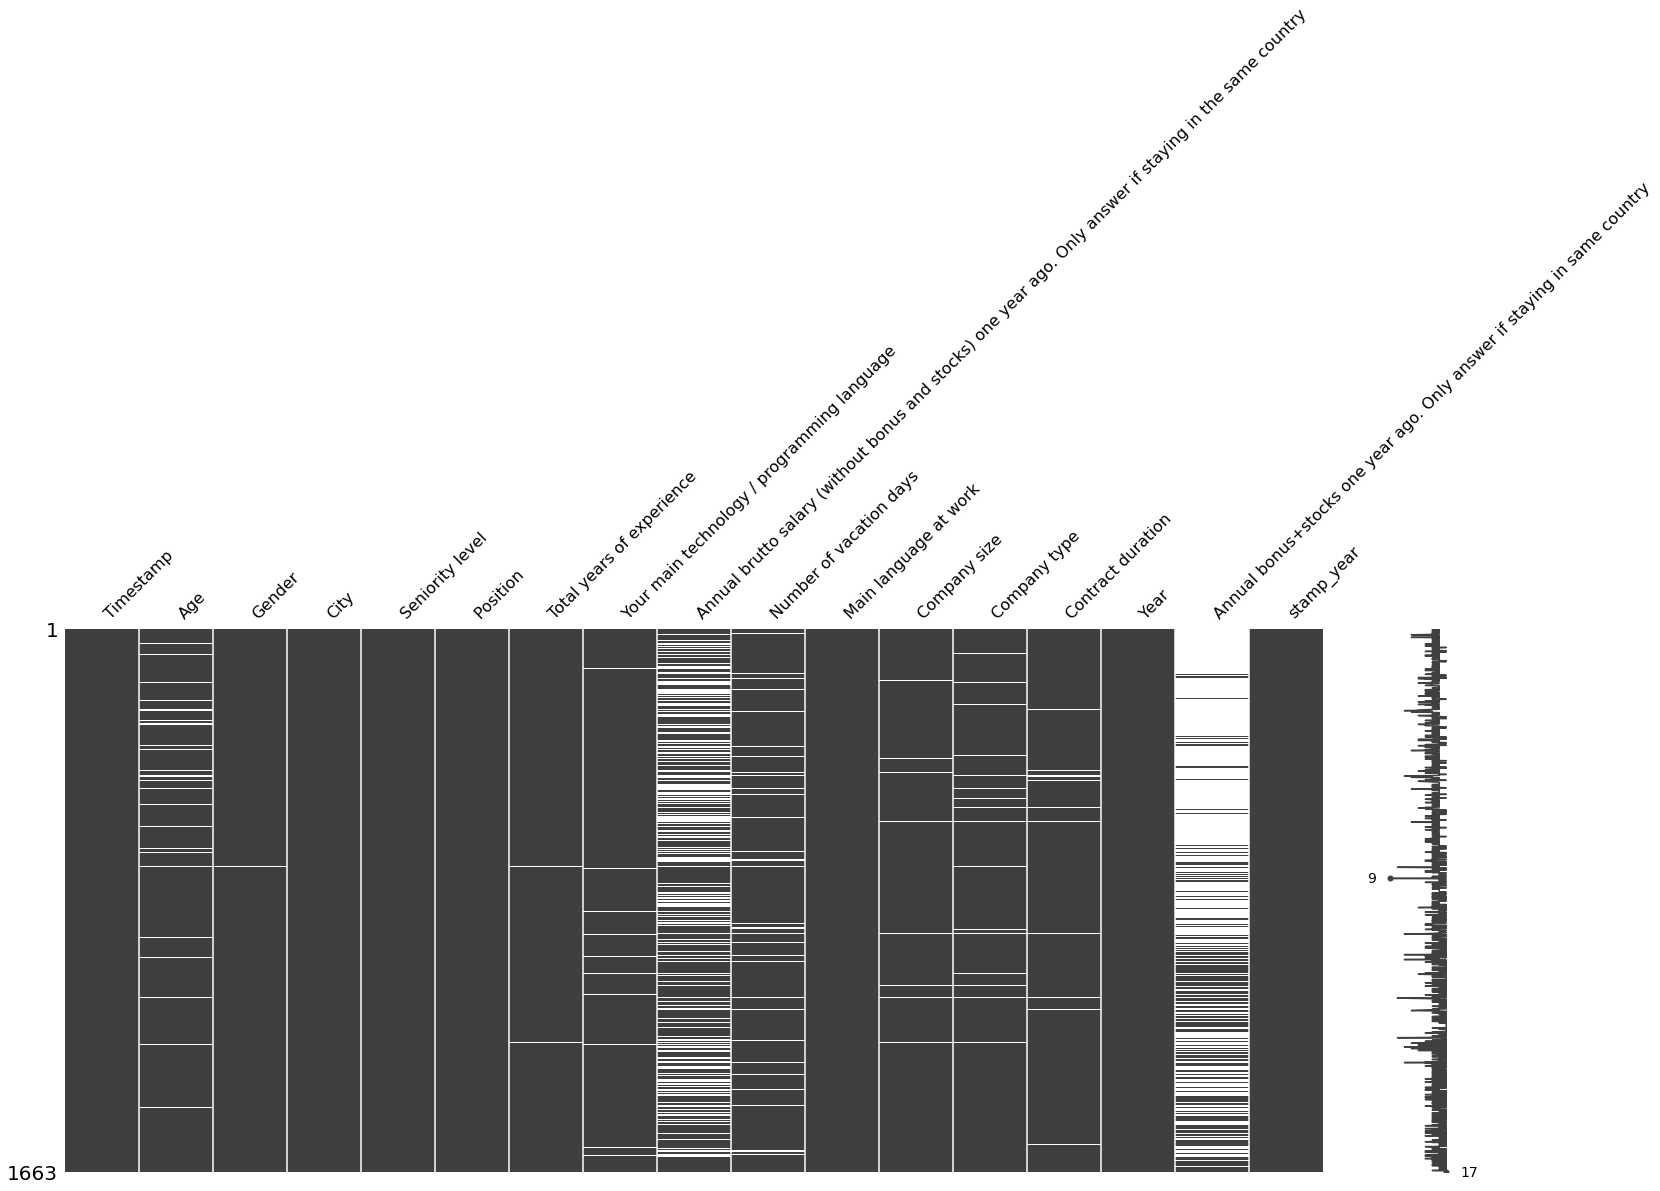

In [ ]:
import missingno as msno
plt.figure(figsize = (15,10));
msno.matrix(full_data_2);


In [ ]:
full_data_2.isna().sum()

Timestamp                                                                                                      0
Age                                                                                                           98
Gender                                                                                                         5
City                                                                                                           0
Seniority level                                                                                                0
Position                                                                                                       0
Total years of experience                                                                                      7
Your main technology / programming language                                                                   52
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same

## **Tratando dados nulos** 

### Idade

In [ ]:
full_data_2['Age'].isna().sum()

98

In [ ]:
full_data_2['Age'].describe()

count    1565.000000
mean       32.246006
std         5.391590
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        66.000000
Name: Age, dtype: float64

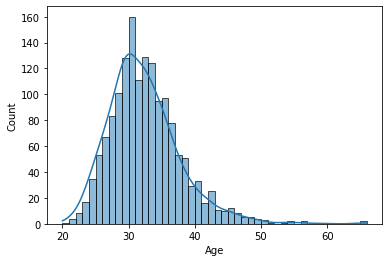

In [ ]:
sns.histplot(full_data_2['Age'] ,kde = True , binwidth=1);

In [ ]:
df_tratado_na = full_data_2
df_tratado_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1215
Data columns (total 17 columns):
 #   Column                                                                                                    Non-Null Count  Dtype         
---  ------                                                                                                    --------------  -----         
 0   Timestamp                                                                                                 1663 non-null   datetime64[ns]
 1   Age                                                                                                       1565 non-null   float64       
 2   Gender                                                                                                    1658 non-null   object        
 3   City                                                                                                      1663 non-null   object        
 4   Seniority level                     

In [ ]:
#Substituindo os valores faltantes pela mediana, pois a média apresenta valores decimais 
#idade é geralmente inteiro
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', missing_values = np.nan)

In [ ]:
df_tratado_na['Age'] = imputer.fit_transform(df_tratado_na[['Age']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_tratado_na['Age'].isna().sum()

0

In [ ]:
df_tratado_na['Age'].describe()

count    1663.000000
mean       32.231509
std         5.230538
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        66.000000
Name: Age, dtype: float64

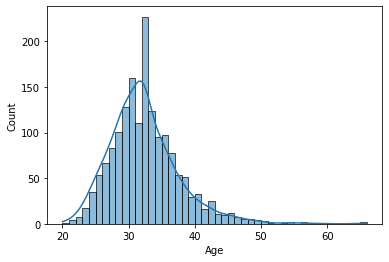

In [ ]:
sns.histplot(df_tratado_na['Age'] ,kde = True , binwidth=1);

### Anos de experiência

In [ ]:
full_data_2['Total years of experience'] = pd.to_numeric(full_data_2['Total years of experience'] , errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
full_data_2['Total years of experience'].describe()

count    1652.000000
mean        8.539044
std         5.135961
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        40.000000
Name: Total years of experience, dtype: float64

In [ ]:
#Observando o valor máximo de 383 anos de experiência, esse valor não é plausível e por isso, todos os valores 
#acima de 100 serão excluidos da nova base
df_tratado_na.drop(df_tratado_na.loc[df_tratado_na['Total years of experience']>=100].index, inplace=True)
df_tratado_na['Total years of experience'].describe().round(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count    1652.0
mean        8.5
std         5.1
min         0.0
25%         5.0
50%         8.0
75%        11.0
max        40.0
Name: Total years of experience, dtype: float64

In [ ]:
df_tratado_na['Total years of experience'].isna().sum()

11

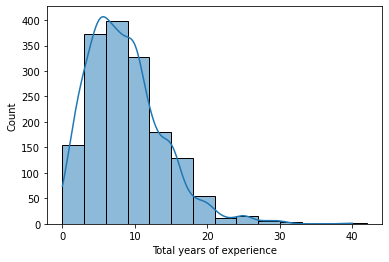

In [ ]:
sns.histplot(df_tratado_na['Total years of experience'] ,kde = True , binwidth=3);

In [ ]:
df_tratado_na['Total years of experience'] = pd.to_numeric(df_tratado_na['Total years of experience'] , errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_tratado_na['Total years of experience'].describe()

count    1652.000000
mean        8.539044
std         5.135961
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        40.000000
Name: Total years of experience, dtype: float64

In [ ]:
#Usando KNN IMPUTATION para preencher os dados nulos de experiência
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_tratado_na['Total years of experience'] = imputer.fit_transform(df_tratado_na[['Total years of experience']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_tratado_na['Total years of experience'].describe()

count    1663.000000
mean        8.539044
std         5.118936
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        40.000000
Name: Total years of experience, dtype: float64

In [ ]:
df_tratado_na['Total years of experience'].isna().sum()

0

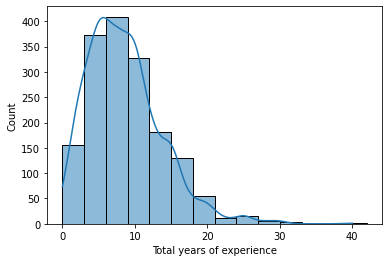

In [ ]:
sns.histplot(df_tratado_na['Total years of experience'] ,kde = True , binwidth=3);

### Dias de férias (Number of vacation days)

In [ ]:
full_data_2['Number of vacation days'].isna().sum()

92

In [ ]:
df_tratado_na['Number of vacation days'] = pd.to_numeric(df_tratado_na['Number of vacation days'] , errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_tratado_na['Number of vacation days'].describe()

count    1564.000000
mean       27.999041
std         4.035214
min         0.000000
25%        26.000000
50%        28.000000
75%        30.000000
max       100.000000
Name: Number of vacation days, dtype: float64

In [ ]:
#Retirando os outliers superiores e inferiores da análise 
df_tratado_na.drop(df_tratado_na.loc[df_tratado_na['Number of vacation days']>=36].index, inplace=True)
df_tratado_na.drop(df_tratado_na.loc[df_tratado_na['Number of vacation days']<=20].index, inplace=True)
df_tratado_na['Number of vacation days'].describe().round(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count    1462.0
mean       28.0
std         2.3
min        21.0
25%        26.0
50%        28.0
75%        30.0
max        35.0
Name: Number of vacation days, dtype: float64

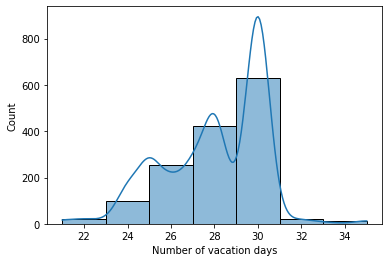

In [ ]:
sns.histplot(df_tratado_na['Number of vacation days'] ,kde = True , binwidth=2);

In [ ]:
imputer = SimpleImputer(strategy='mean', missing_values = np.nan)
df_tratado_na['Number of vacation days'] = imputer.fit_transform(df_tratado_na[['Number of vacation days']])
df_tratado_na['Number of vacation days'].describe().round(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    1560.0
mean       28.0
std         2.2
min        21.0
25%        27.0
50%        28.0
75%        30.0
max        35.0
Name: Number of vacation days, dtype: float64

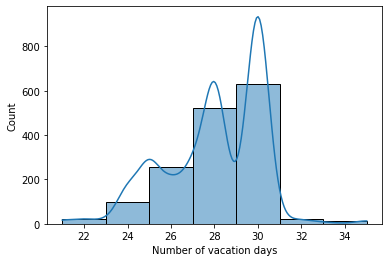

In [ ]:
sns.histplot(df_tratado_na['Number of vacation days'] ,kde = True , binwidth=2);

### Salário Bruto Anual

In [ ]:
full_data_2.isna().sum()

Timestamp                                                                                                      0
Age                                                                                                            0
Gender                                                                                                         4
City                                                                                                           0
Seniority level                                                                                                0
Position                                                                                                       0
Total years of experience                                                                                      0
Your main technology / programming language                                                                   50
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same

In [ ]:
full_data_2['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].describe()

count      1028.000000
mean      65470.131323
std       17699.646078
min           0.000000
25%       55000.000000
50%       65000.000000
75%       75000.000000
max      200000.000000
Name: Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country, dtype: float64

In [ ]:
#Retirando os outliers superiores da análise 
df_tratado_na.drop(df_tratado_na.loc[df_tratado_na['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country']>=1.05e+5].index, inplace=True)
df_tratado_na['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].describe().round(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count       994.0
mean      64022.4
std       14950.5
min           0.0
25%       55000.0
50%       65000.0
75%       75000.0
max      104000.0
Name: Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country, dtype: float64

In [ ]:
#Retirando os outliers inferiores da análise 
df_tratado_na.drop(df_tratado_na.loc[df_tratado_na['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country']<=35470].index, inplace=True)
df_tratado_na['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].describe().round(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count       947.0
mean      65599.7
std       12786.3
min       36000.0
25%       56000.0
50%       65000.0
75%       75000.0
max      104000.0
Name: Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country, dtype: float64

In [ ]:
#Reduzindo o nome da coluna 
df_tratado_na.rename(columns={'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'Annual bruto salary one year ago (same country)'
                          }, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


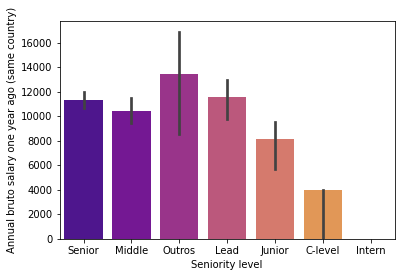

In [ ]:
sns.barplot(x ='Seniority level', y ='Annual bruto salary one year ago (same country)', data = df_tratado_na,
            palette ='plasma', estimator = np.std);

In [ ]:
df_tratado_na[['Seniority level','Annual bruto salary one year ago (same country)']].groupby('Seniority level').median()

,Annual bruto salary one year ago (same country)
Seniority level,
C-level,81000.0
Intern,NaN
Junior,45500.0
Lead,75000.0
Middle,56250.0
Outros,75000.0
Senior,67000.0


In [ ]:
d1 = df_tratado_na[['Seniority level','Annual bruto salary one year ago (same country)']].groupby('Seniority level').median().to_dict()
d1

{'Annual bruto salary one year ago (same country)': {'C-level': 81000.0,
  'Intern': nan,
  'Junior': 45500.0,
  'Lead': 75000.0,
  'Middle': 56250.0,
  'Outros': 75000.0,
  'Senior': 67000.0}}

In [ ]:
d1 = {'C-level': 85000.0,
  'Intern': 30000.0,
  'Junior': 42000.0,
  'Lead': 75000.0,
  'Middle': 55000.0,
  'Outros': 75000.0,
  'Senior': 66000.0}

In [ ]:
df_tratado_na['Annual bruto salary one year ago (same country)'] = df_tratado_na['Annual bruto salary one year ago (same country)'].fillna(df_tratado_na['Seniority level'].map(d1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_tratado_na['Annual bruto salary one year ago (same country)'].isna().sum()

0

In [ ]:
df_tratado_na['Annual bruto salary one year ago (same country)'].describe().round(1)

count      1461.0
mean      63796.0
std       11911.8
min       30000.0
25%       55000.0
50%       65000.0
75%       70000.0
max      104000.0
Name: Annual bruto salary one year ago (same country), dtype: float64

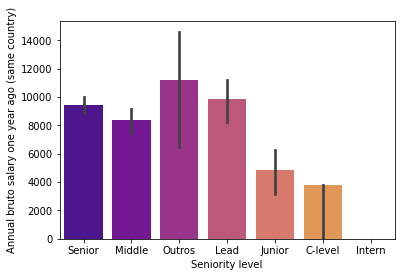

In [ ]:
sns.barplot(x ='Seniority level', y ='Annual bruto salary one year ago (same country)', data = df_tratado_na,
            palette ='plasma', estimator = np.std);

# Convertendo Variáveis Categóricas

## Ordinal encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Criando a cópia do dataframe para a realização das conversõies das variáveis categóricas 
df_test_ordinal = df_tratado_na.copy(deep = True)

In [ ]:
#Lendo quais são as categorias presentes 
df_test_ordinal['Seniority level'].unique()

array(['Senior', 'Middle', 'Outros', 'Lead', 'Junior', 'C-level',
       'Intern'], dtype=object)

In [ ]:
#Criando o Array de ordenação 
nivel = [ 'C-level', 'Senior', 'Middle', 'Lead', 'Junior',
       'Intern', 'Outros']

In [ ]:
#Criando a variável de ordenação pelo ordinalEncoder
ord = OrdinalEncoder(categories=[nivel])

In [ ]:
ord.fit(df_test_ordinal[['Seniority level']])

OrdinalEncoder(categories=[['C-level', 'Senior', 'Middle', 'Lead', 'Junior',
                            'Intern', 'Outros']])

In [ ]:
#Realizando a transformação dos dados de senioridade 
ord.transform(df_test_ordinal[['Seniority level']])

array([[1.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [3.]])

In [ ]:
df_test_ordinal['Seniority level']

0       Senior
1       Middle
2       Middle
3       Senior
6       Senior
         ...  
1211    Middle
1212      Lead
1213    Senior
1214    Senior
1215      Lead
Name: Seniority level, Length: 1461, dtype: object

In [ ]:
#Apresentando o resultado final
pd.DataFrame(ord.transform(df_test_ordinal[['Seniority level']]))

,0
0,1.0
1,2.0
2,2.0
3,1.0
4,1.0
...,...
1456,2.0
1457,3.0
1458,1.0
1459,1.0


## One Hot Encoding

### - Position

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Criando a variável de transformação pelo OneHotEncoder
onehotencoder = OneHotEncoder()

In [ ]:
#Criando um array com os dados transformados do cargo(Position)
feature_arry = onehotencoder.fit_transform(df_test_ordinal[['Position ']]).toarray()

In [ ]:
onehotencoder.categories_

[array(['Backend Developer', 'Data Engineer', 'Data Scientist', 'DevOps',
        'Frontend Developer', 'Fullstack Developer', 'Manager',
        'Mobile Developer', 'QA Engineer', 'Software Engineer'],
       dtype=object)]

In [ ]:
#Criando um array com as categorias existentes 
feature_labels = onehotencoder.categories_

In [ ]:
np.array(feature_labels, dtype=object)

array([['Backend Developer', 'Data Engineer', 'Data Scientist', 'DevOps',
        'Frontend Developer', 'Fullstack Developer', 'Manager',
        'Mobile Developer', 'QA Engineer', 'Software Engineer']],
      dtype=object)

In [ ]:
feature_labels = np.array(feature_labels).ravel()
print (feature_labels)

['Backend Developer' 'Data Engineer' 'Data Scientist' 'DevOps'
 'Frontend Developer' 'Fullstack Developer' 'Manager' 'Mobile Developer'
 'QA Engineer' 'Software Engineer']


In [ ]:
#Criando um dataframe a partir dos dados transormados e das categorias existentes
pd.DataFrame(feature_arry, columns=feature_labels)

,Backend Developer,Data Engineer,Data Scientist,DevOps,Frontend Developer,Fullstack Developer,Manager,Mobile Developer,QA Engineer,Software Engineer
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1459,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### - Gender

Os mesmos passos realizados para o OneHot Encoding do cargo (Position) foram realizados para o gênero

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder()

In [ ]:
feature_arry = onehotencoder.fit_transform(df_test_ordinal[['Gender']]).toarray()

In [ ]:
onehotencoder.categories_

[array(['Diverse', 'Female', 'Male', nan], dtype=object)]

In [ ]:
feature_labels = onehotencoder.categories_

In [ ]:
np.array(feature_labels, dtype=object)

array([['Diverse', 'Female', 'Male', nan]], dtype=object)

In [ ]:
feature_labels = np.array(feature_labels).ravel()
print (feature_labels)

['Diverse' 'Female' 'Male' nan]


In [ ]:
pd.DataFrame(feature_arry, columns=feature_labels)

,Diverse,Female,Male,NaN
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1456,0.0,0.0,1.0,0.0
1457,0.0,1.0,0.0,0.0
1458,0.0,0.0,1.0,0.0
1459,0.0,0.0,1.0,0.0


# -Convertendo variáveis numéricas 

### MinMax Scaler ('Annual bruto salary one year ago (same country)')

In [ ]:
#Criando uma cópia do dataframe de dados nulos tratados para as análises
df_test_num = df_tratado_na.copy(deep = True)

In [ ]:
df_tratado_na['Annual bruto salary one year ago (same country)'].describe().round(1)

count      1461.0
mean      63796.0
std       11911.8
min       30000.0
25%       55000.0
50%       65000.0
75%       70000.0
max      104000.0
Name: Annual bruto salary one year ago (same country), dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_test_num[['Annual bruto salary one year ago (same country)']] = scaler.fit_transform(df_test_num[['Annual bruto salary one year ago (same country)']])

In [ ]:
#Informações após o rescaling aplicado
df_test_num['Annual bruto salary one year ago (same country)'].describe().round(1)

count    1461.0
mean        0.5
std         0.2
min         0.0
25%         0.3
50%         0.5
75%         0.5
max         1.0
Name: Annual bruto salary one year ago (same country), dtype: float64

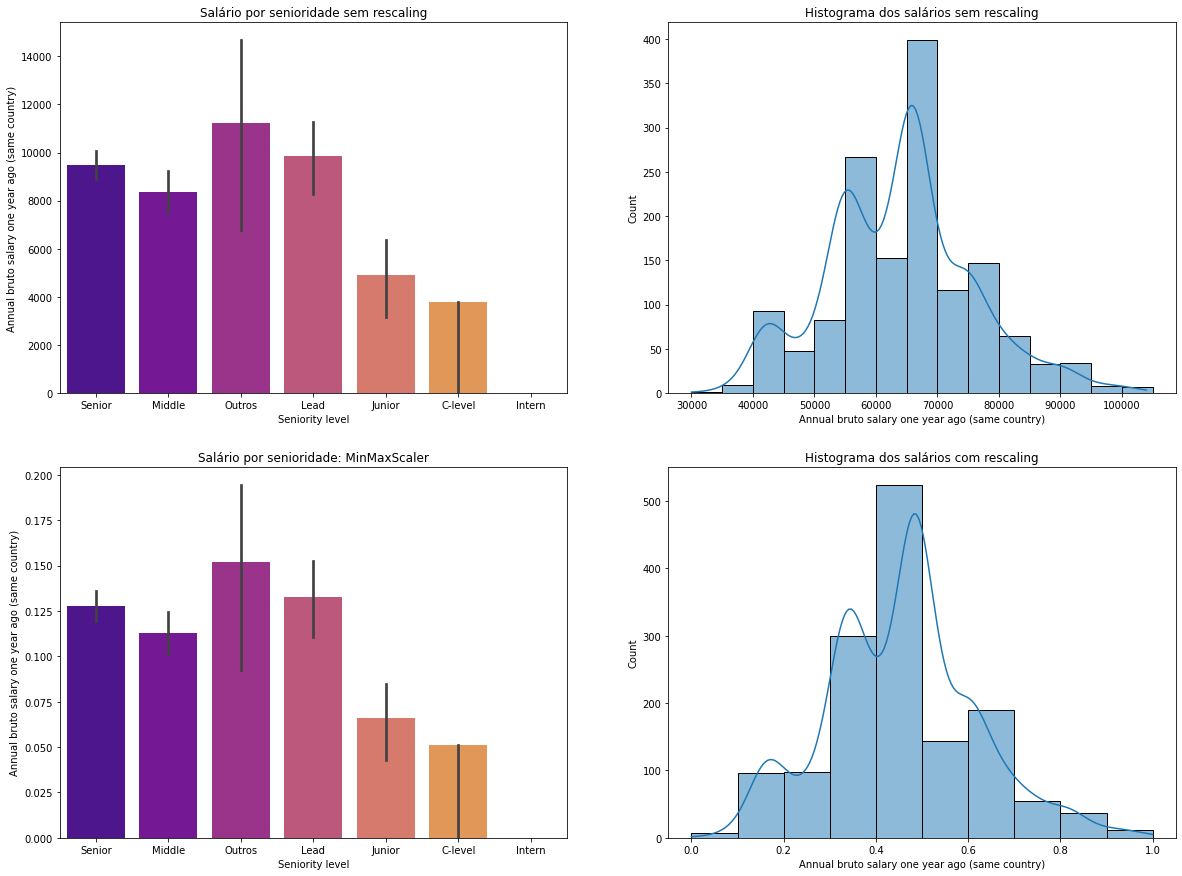

In [ ]:
#Análise gráfica do comportamento dos dados antes e após o rescaling
import matplotlib.pyplot as plt
figure, axis = plt.subplots(2, 2 , figsize= ( 20 , 15)) 
sns.barplot(ax=axis[0,0], x ='Seniority level', y ='Annual bruto salary one year ago (same country)', data = df_tratado_na,
            palette ='plasma', estimator = np.std);
axis[0, 0].set_title("Salário por senioridade sem rescaling") ;
sns.histplot(ax=axis[0,1], data = df_tratado_na['Annual bruto salary one year ago (same country)'] ,kde = True , binwidth=5000);
axis[0, 1].set_title("Histograma dos salários sem rescaling");
sns.barplot(ax=axis[1,0], x ='Seniority level', y ='Annual bruto salary one year ago (same country)', data = df_test_num,
            palette ='plasma', estimator = np.std);
axis[1, 0].set_title("Salário por senioridade: MinMaxScaler");
sns.histplot(ax=axis[1,1], data = df_test_num['Annual bruto salary one year ago (same country)'] ,kde = True , binwidth=0.1);
axis[1, 1].set_title("Histograma dos salários com rescaling");

É possível notar que o uso do MinMax Scaler não altera o comportamento dos dados, apenas os adequando à nova escala de estudo.

### Standart Scaler ('Total years of experience')

In [ ]:
df_tratado_na['Total years of experience'].describe().round(1)

count    1461.0
mean        8.6
std         5.1
min         0.0
25%         5.0
50%         8.0
75%        11.0
max        40.0
Name: Total years of experience, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Criando a variável de transformação 
std_scaler = StandardScaler()

In [ ]:
#Aplicando o rescaling na coluna de anos de experiência
df_test_num[['Total years of experience']] = std_scaler.fit_transform(df_test_num[['Total years of experience']])

In [ ]:
df_test_num['Total years of experience'].describe().round(1)

count    1461.0
mean        0.0
std         1.0
min        -1.7
25%        -0.7
50%        -0.1
75%         0.5
max         6.2
Name: Total years of experience, dtype: float64

Percebe-se que após a aplicação do Standart Scaler, a média da amostra se transforma em 0

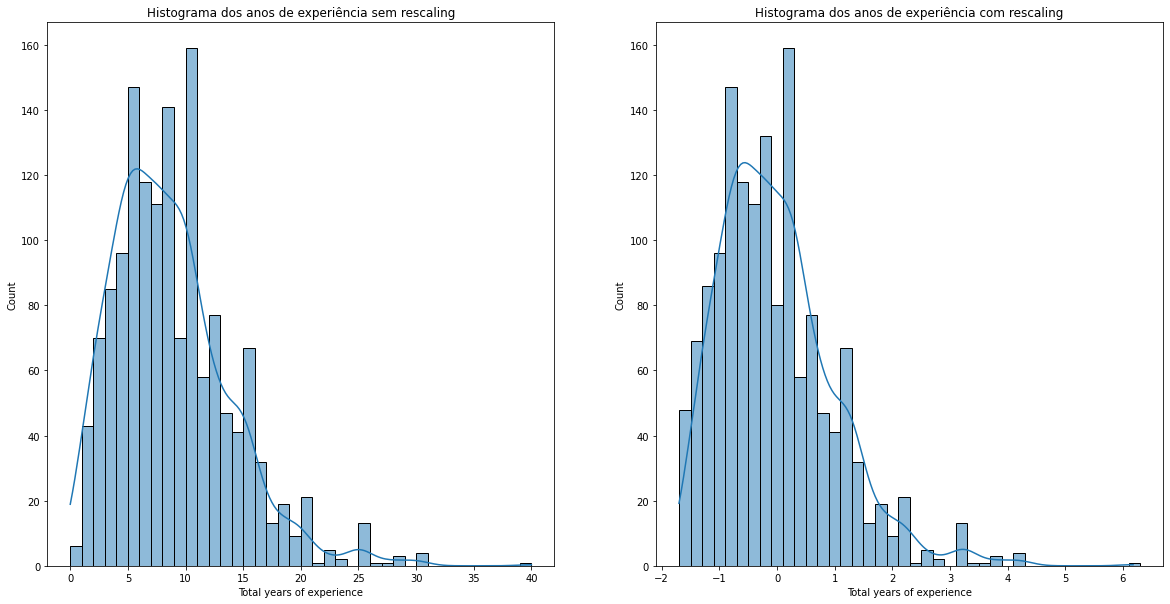

In [ ]:
figure, axis = plt.subplots(1, 2 , figsize= ( 20 , 10)) 
sns.histplot(ax=axis[0], data = df_tratado_na['Total years of experience'] ,kde = True , binwidth=1);
axis[0].set_title("Histograma dos anos de experiência sem rescaling") ;
sns.histplot(ax=axis[1], data = df_test_num['Total years of experience'] ,kde = True , binwidth=0.2);
axis[1].set_title("Histograma dos anos de experiência com rescaling");

Apesar da aplicação do rescaling nos dados, o comportamento se apresenta semelhante ao original, de modo que os dados foram rearranjados para se encontrarem com a média 0

#-Discretização das variáveis idade e salário

In [ ]:
#Importando a biblioteca e criando as variáveis de parâmetro
from sklearn.preprocessing import KBinsDiscretizer
kbins_uniforme = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
kbins_quantile = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [ ]:
#Criando uma cópia do dataframe com os dados nulos tratados
data_trans = df_tratado_na.copy(deep = True)

In [ ]:
#Aplicando as discretizações ao salário bruto anual
data_trans_uniform_salario= kbins_uniforme.fit_transform(data_trans[['Annual bruto salary one year ago (same country)']])
data_trans_quantile_salario= kbins_quantile.fit_transform(data_trans[['Annual bruto salary one year ago (same country)']])

(1461, 1)

In [ ]:
#Aplicando as discretizações à idade 
data_trans_uniform_age= kbins_uniforme.fit_transform(data_trans[['Age']])
data_trans_quantile_age= kbins_quantile.fit_transform(data_trans[['Age']])

(1461, 1)

In [ ]:
dados = np.array([data_trans_uniform_salario , data_trans_quantile_salario , data_trans_uniform_age , data_trans_quantile_age])
dados.reshape(4, 1461)
labels = np.array(['Salário Uniform' , 'Salário Quantile' , 'Idade Uniform' , 'Idade Qantile']).ravel()
dados.shape
#df_discretizado = pd.DataFrame(dados , columns = labels)

(4, 1461, 1)

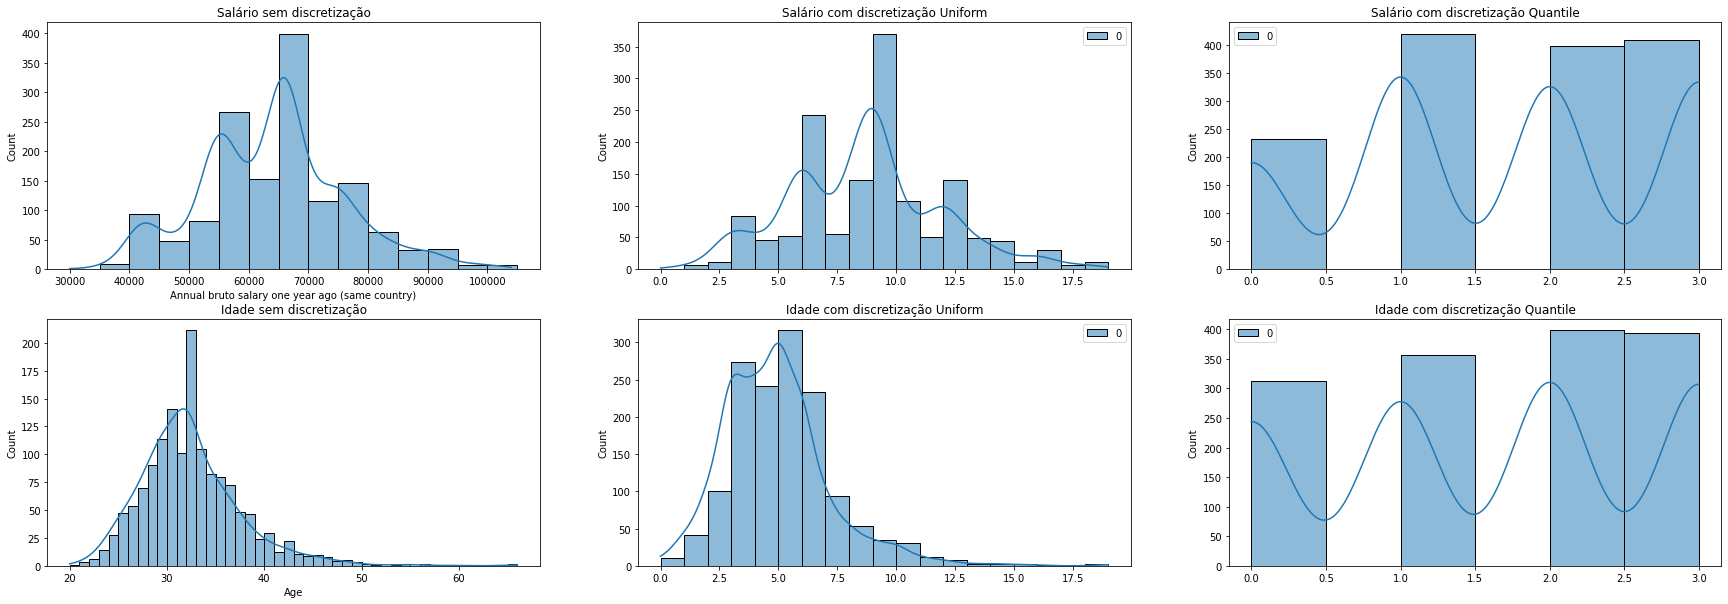

In [ ]:
#Criando as vizualizações gráficas
import matplotlib.pyplot as plt
figure, axis = plt.subplots(2, 3 , figsize= ( 30 , 10)) 
sns.histplot(ax=axis[0,0], data = df_tratado_na['Annual bruto salary one year ago (same country)'],kde = True , binwidth=5000);
axis[0, 0].set_title("Salário sem discretização") ;
sns.histplot(ax=axis[0,1], data = data_trans_uniform_salario,kde = True , binwidth=1);
axis[0, 1].set_title("Salário com discretização Uniform");
sns.histplot(ax=axis[0,2], data = data_trans_quantile_salario,kde = True , binwidth=0.5);
axis[0, 2].set_title("Salário com discretização Quantile");
sns.histplot(ax=axis[1,0], data = df_tratado_na['Age'],kde = True , binwidth=1);
axis[1, 0].set_title("Idade sem discretização");
sns.histplot(ax=axis[1,1], data = data_trans_uniform_age,kde = True , binwidth=1);
axis[1, 1].set_title("Idade com discretização Uniform");
sns.histplot(ax=axis[1,2], data = data_trans_quantile_age,kde = True , binwidth=0.5);
axis[1, 2].set_title("Idade com discretização Quantile");

É possível perceber para ambos os casos que a discretização uniforme preserva o comportamento da distribuição dos dados, apenas os agrupando uniformemente dentre as divisões criadas, já a distribuição quantile agrupa os dados pertencentes aos quantis solicitados, para esse caso foram solicitados 4 quantis. 